In [188]:
import json
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [30]:
data_path = Path("data.json")
lines = data_path.read_text().splitlines()
data = [json.loads(l) for l in lines]

In [31]:
data[0]

{'jobId': 0,
 'stageId': 0,
 'name': 'repartition at Tools.scala:67',
 'submissionTime': 1603225776764,
 'completionTime': 1603225777054,
 'stageDuration': 290,
 'numTasks': 1,
 'executorRunTime': 67,
 'executorCpuTime': 66,
 'executorDeserializeTime': 121,
 'executorDeserializeCpuTime': 60,
 'resultSerializationTime': 10,
 'jvmGCTime': 13,
 'resultSize': 999,
 'diskBytesSpilled': 0,
 'memoryBytesSpilled': 0,
 'peakExecutionMemory': 0,
 'recordsRead': 1,
 'bytesRead': 73088,
 'recordsWritten': 0,
 'bytesWritten': 0,
 'shuffleFetchWaitTime': 0,
 'shuffleTotalBytesRead': 0,
 'shuffleTotalBlocksFetched': 0,
 'shuffleLocalBlocksFetched': 0,
 'shuffleRemoteBlocksFetched': 0,
 'shuffleLocalBytesRead': 0,
 'shuffleRemoteBytesRead': 0,
 'shuffleRemoteBytesReadToDisk': 0,
 'shuffleRecordsRead': 0,
 'shuffleWriteTime': 3,
 'shuffleBytesWritten': 49629,
 'shuffleRecordsWritten': 10}

In [182]:
df = pd.DataFrame.from_dict(data)
pd.options.display.max_columns = None
df

,jobId,stageId,name,submissionTime,completionTime,stageDuration,numTasks,executorRunTime,executorCpuTime,executorDeserializeTime,executorDeserializeCpuTime,resultSerializationTime,jvmGCTime,resultSize,diskBytesSpilled,memoryBytesSpilled,peakExecutionMemory,recordsRead,bytesRead,recordsWritten,bytesWritten,shuffleFetchWaitTime,shuffleTotalBytesRead,shuffleTotalBlocksFetched,shuffleLocalBlocksFetched,shuffleRemoteBlocksFetched,shuffleLocalBytesRead,shuffleRemoteBytesRead,shuffleRemoteBytesReadToDisk,shuffleRecordsRead,shuffleWriteTime,shuffleBytesWritten,shuffleRecordsWritten
0,0,0,repartition at Tools.scala:67,1603225776764,1603225777054,290,1,67,66,121,60,10,13,999,0,0,0,1,73088,0,0,0,0,0,0,0,0,0,0,0,3,49629,10
1,0,1,count at BlsSpeller.scala:155,1603225777060,1603225777142,82,2,40,29,4,3,36,0,2020,0,0,0,0,0,0,0,0,49629,2,2,0,49629,0,0,10,0,0,0
2,1,3,BinaryPipedRDD at Tools.scala:94,1603225777217,1603226405387,628170,2,1110820,41,5,4,16,4,2643,0,0,17608,0,0,0,0,0,49629,2,2,0,49629,0,0,10,1,805,23
3,1,4,runJob at SparkHadoopWriter.scala:78,1603226405388,1603226405597,209,2,293,237,38,37,28,3,2513,0,0,14592,0,0,29,1634,0,805,4,4,0,805,0,0,23,0,0,0
4,2,5,take at stagemetrics.scala:207,1603226408299,1603226408596,297,4,52,22,62,42,493,620,6076,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,594,4
5,2,6,take at stagemetrics.scala:207,1603226408596,1603226408774,178,1,6,5,1,1,160,153,1776,0,0,0,0,0,0,0,0,594,4,4,0,594,0,0,4,0,0,0
6,3,7,collect at stagemetrics.scala:245,1603226409080,1603226409601,521,12,3693,607,79,48,1010,2143,24504,0,0,3145728,0,0,0,0,0,0,0,0,0,0,0,0,0,1957,6836,64
7,3,8,collect at stagemetrics.scala:245,1603226409612,1603226416645,7033,200,17414,1235,7696,619,41638,54020,505239,0,0,455081984,0,0,0,0,0,6836,64,64,0,6836,0,0,64,0,0,0
8,4,10,collect at stagemetrics.scala:245,1603226416674,1603226422331,5657,200,11263,1072,19373,1829,30768,44620,533296,0,0,455081984,0,0,0,0,1,6836,64,64,0,6836,0,0,64,232,2564,24
9,4,11,collect at stagemetrics.scala:245,1603226422333,1603226423176,843,24,1999,208,1443,38,5188,5722,73941,0,0,404226048,0,0,0,0,0,2564,24,24,0,2564,0,0,24,0,0,0


In [183]:
df["submissionTime"] = pd.to_datetime(df["submissionTime"], unit="ms")
df["completionTime"] = pd.to_datetime(df["completionTime"], unit="ms")
df["executorCpuTime"] = df["executorCpuTime"] / 1000
df["executorDeserializeCpuTime"] = df["executorDeserializeCpuTime"] / 1000
df

,jobId,stageId,name,submissionTime,completionTime,stageDuration,numTasks,executorRunTime,executorCpuTime,executorDeserializeTime,executorDeserializeCpuTime,resultSerializationTime,jvmGCTime,resultSize,diskBytesSpilled,memoryBytesSpilled,peakExecutionMemory,recordsRead,bytesRead,recordsWritten,bytesWritten,shuffleFetchWaitTime,shuffleTotalBytesRead,shuffleTotalBlocksFetched,shuffleLocalBlocksFetched,shuffleRemoteBlocksFetched,shuffleLocalBytesRead,shuffleRemoteBytesRead,shuffleRemoteBytesReadToDisk,shuffleRecordsRead,shuffleWriteTime,shuffleBytesWritten,shuffleRecordsWritten
0,0,0,repartition at Tools.scala:67,2020-10-20 20:29:36.764,2020-10-20 20:29:37.054,290,1,67,0.066,121,0.060,10,13,999,0,0,0,1,73088,0,0,0,0,0,0,0,0,0,0,0,3,49629,10
1,0,1,count at BlsSpeller.scala:155,2020-10-20 20:29:37.060,2020-10-20 20:29:37.142,82,2,40,0.029,4,0.003,36,0,2020,0,0,0,0,0,0,0,0,49629,2,2,0,49629,0,0,10,0,0,0
2,1,3,BinaryPipedRDD at Tools.scala:94,2020-10-20 20:29:37.217,2020-10-20 20:40:05.387,628170,2,1110820,0.041,5,0.004,16,4,2643,0,0,17608,0,0,0,0,0,49629,2,2,0,49629,0,0,10,1,805,23
3,1,4,runJob at SparkHadoopWriter.scala:78,2020-10-20 20:40:05.388,2020-10-20 20:40:05.597,209,2,293,0.237,38,0.037,28,3,2513,0,0,14592,0,0,29,1634,0,805,4,4,0,805,0,0,23,0,0,0
4,2,5,take at stagemetrics.scala:207,2020-10-20 20:40:08.299,2020-10-20 20:40:08.596,297,4,52,0.022,62,0.042,493,620,6076,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,594,4
5,2,6,take at stagemetrics.scala:207,2020-10-20 20:40:08.596,2020-10-20 20:40:08.774,178,1,6,0.005,1,0.001,160,153,1776,0,0,0,0,0,0,0,0,594,4,4,0,594,0,0,4,0,0,0
6,3,7,collect at stagemetrics.scala:245,2020-10-20 20:40:09.080,2020-10-20 20:40:09.601,521,12,3693,0.607,79,0.048,1010,2143,24504,0,0,3145728,0,0,0,0,0,0,0,0,0,0,0,0,0,1957,6836,64
7,3,8,collect at stagemetrics.scala:245,2020-10-20 20:40:09.612,2020-10-20 20:40:16.645,7033,200,17414,1.235,7696,0.619,41638,54020,505239,0,0,455081984,0,0,0,0,0,6836,64,64,0,6836,0,0,64,0,0,0
8,4,10,collect at stagemetrics.scala:245,2020-10-20 20:40:16.674,2020-10-20 20:40:22.331,5657,200,11263,1.072,19373,1.829,30768,44620,533296,0,0,455081984,0,0,0,0,1,6836,64,64,0,6836,0,0,64,232,2564,24
9,4,11,collect at stagemetrics.scala:245,2020-10-20 20:40:22.333,2020-10-20 20:40:23.176,843,24,1999,0.208,1443,0.038,5188,5722,73941,0,0,404226048,0,0,0,0,0,2564,24,24,0,2564,0,0,24,0,0,0


In [207]:
def plot_n_active_tasks(df):
#     colormap = cm.get_cmap('viridis', df["stageId"].max() + 1)
#     colors = df["jobId"].apply(lambda x: colormap.colors[x])
    plot = df.plot.bar(x="submissionTime", y=["numTasks"])
    
def plot_jvm_cpu_usage(df):
    plot = df.plot.bar(x="submissionTime", y=["executorCpuTime"])

def plot_time_components(df):
    components = [
        "executorDeserializeCpuTime", 
        "executorDeserializeTime",
        "executorCpuTime",
        "shuffleWriteTime",
        "resultSerializationTime",
        "shuffleFetchWaitTime",
        "jvmGCTime",
    ]
#     fig, ax = plt.subplots(1, 1)
    ax = df.plot.line(x="submissionTime", y="executorRunTime", use_index=False)
    df.plot.bar(x="submissionTime", y=components, stacked=True, use_index=False, ax=ax)
    
    
def plot_peak_memory(df):
    plot = df.plot.bar(x="submissionTime", y=["peakExecutionMemory"])

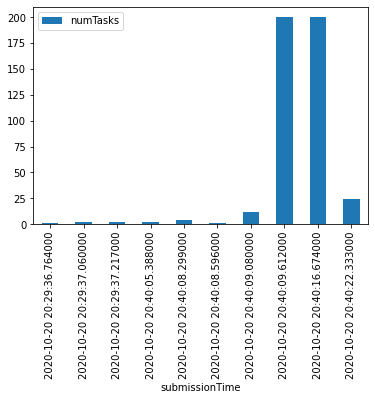

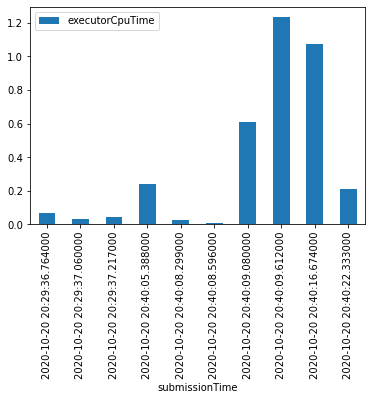

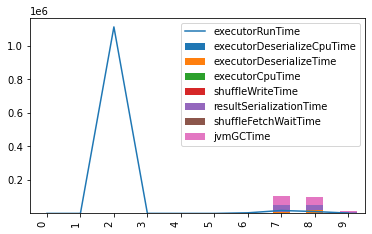

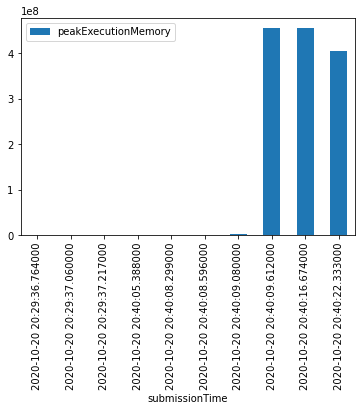

In [208]:
plot_n_active_tasks(df)
plot_jvm_cpu_usage(df)
plot_time_components(df)
plot_peak_memory(df)